# HOUSING: PRICE PREDICTION

## Problem Statement:
Houses are one of the necessary needs of each and every person around the globe
and therefore housing and real estate market is one of the markets which is one of
the major contributors to the world’s economy. It is a very large market and there are
various companies working in the domain. Data science comes as a very important
tool to solve problems in the domain to help companies increase their overall
revenue, and profits, improve their marketing strategies and focus on changing
trends in house sales and purchases. Predictive modeling, Market mix modeling, and
recommendation systems are some of the machine learning techniques used for
achieving the business goals of housing companies. Our problem is related to one
such housing company. 

A US-based housing company named Surprise Housing has
decided to enter the Australian market. The company uses data analytics to
purchase houses at a price below their actual values and flip them at a higher price.
For the same purpose, the company has collected a data set from the sale of houses
in Australia. The data is provided in the CSV file below. The company is looking at
prospective properties to buy houses to enter the market. You are required to build a
model using Machine Learning in order to predict the actual value of the prospective
properties and decide whether to invest in them or not. This company wants to know:

• Which variables are important to predict the price of a variable?
• How do these variables describe the price of the house

## Business Goal: 
You are required to model the price of houses with the available
independent variables. This model will then be used by the management to
understand how exactly the prices vary with the variables. They can accordingly
manipulate the strategy of the firm and concentrate on areas that will yield high
returns. Further, the model will be a good way for the management to understand the
pricing dynamics of a new market.


### Importing the necessary libaries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Loading the training dataset 

In [5]:
# Saleprice is out target variable

dataset1=pd.read_csv(r"https://lms.intrnforte.com/wp-content/uploads/2022/10/Housing-project-train-data.csv")
dataset1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [7]:
dataset1.shape

(1168, 81)

In [9]:
dataset1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### EDA

In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [14]:
# descriptive statistics 
dataset1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
dataset1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [18]:
# removing this features as they contain many missing values 

dataset1=dataset1.drop(['LotFrontage','Alley','FireplaceQu','PoolQC' ,'Fence','MiscFeature'],axis=1)
dataset1.shape

(1168, 75)

In [20]:
# this only refers to indexing so no importance of this feature
dataset1.drop('Id',axis=1,inplace=True)

In [22]:
# will drop all rows (axis=0) that contain at least one null value in any column. 
# if we use dropna(inplace=True) it modifies the original dataset 

dataset1.dropna(axis=0,inplace=True)
dataset1.isnull().sum()



MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [24]:
dataset1.shape

(453, 74)

In [26]:
dataset1.nunique().to_frame("Number of Unique Values ")

,Number of Unique Values
MSSubClass,12
MSZoning,4
LotArea,396
Street,1
LotShape,4
...,...
MoSold,12
YrSold,5
SaleType,7
SaleCondition,5


<Figure size 800x600 with 0 Axes>

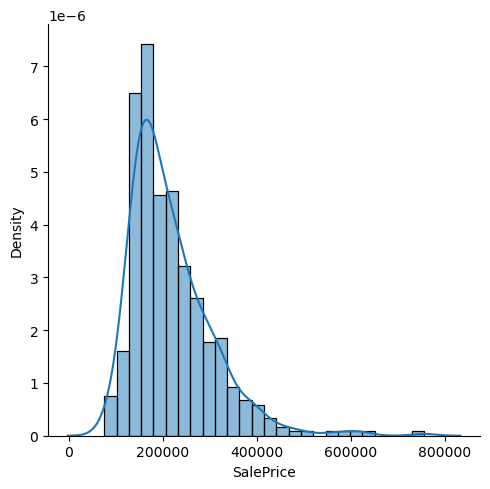

In [28]:
# probability density fxn for target variable to see how it varies 

plt.figure(figsize=(8, 6))     #(width,height)

sns.displot(dataset1['SalePrice'],kde=True, stat='density', kde_kws=dict(cut=3))

In [29]:
categorical_columns = dataset1.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


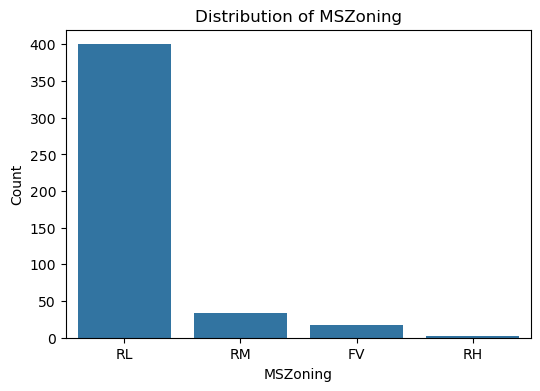

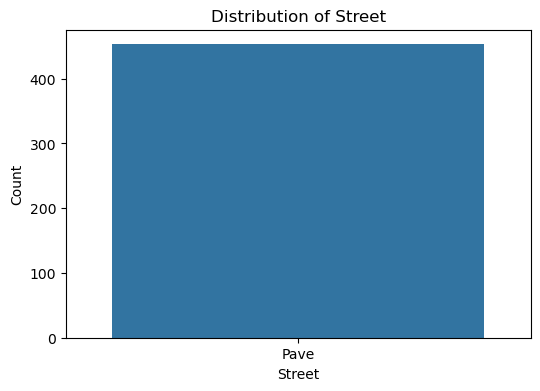

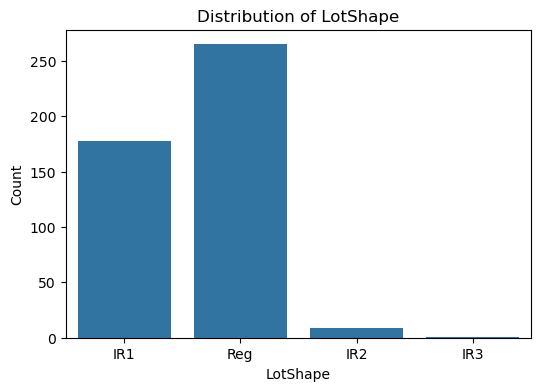

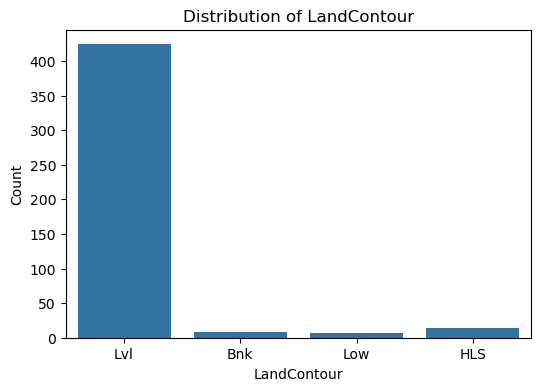

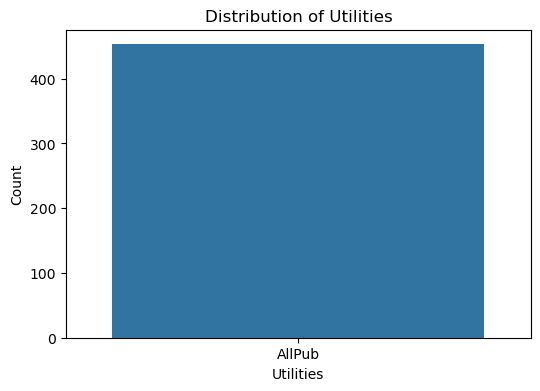

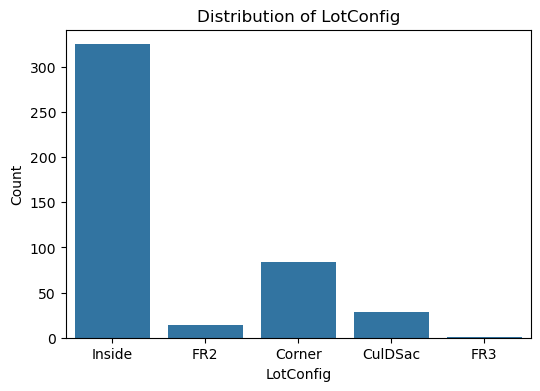

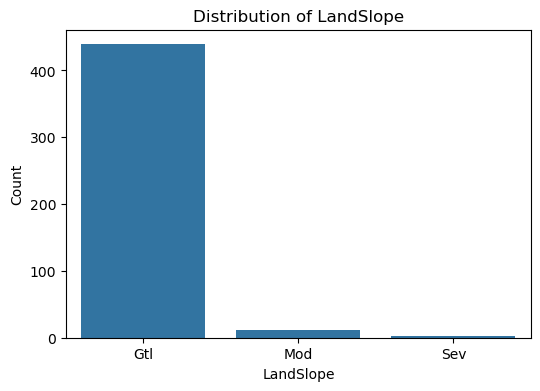

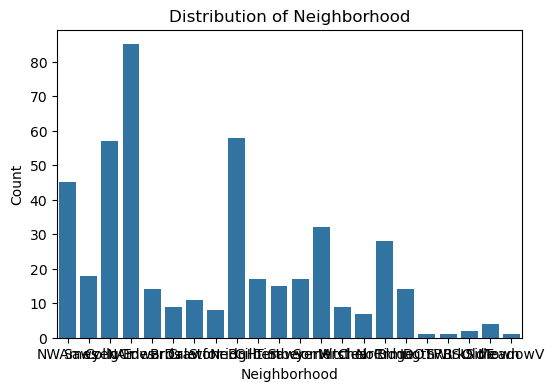

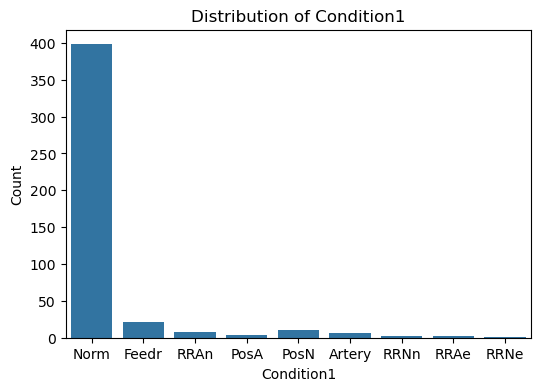

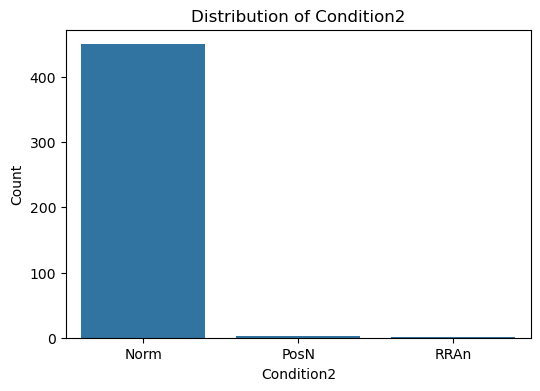

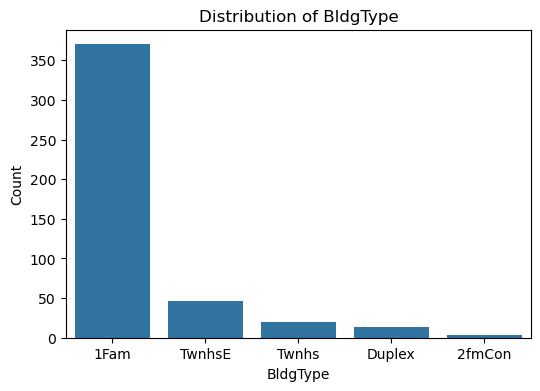

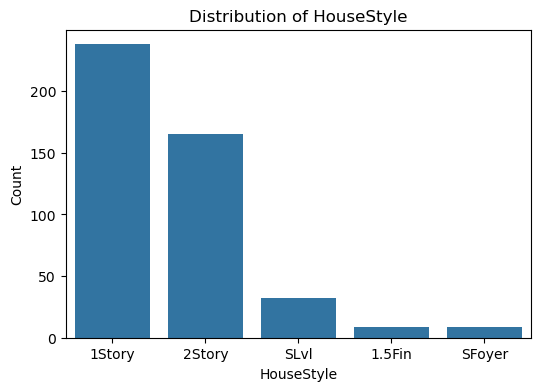

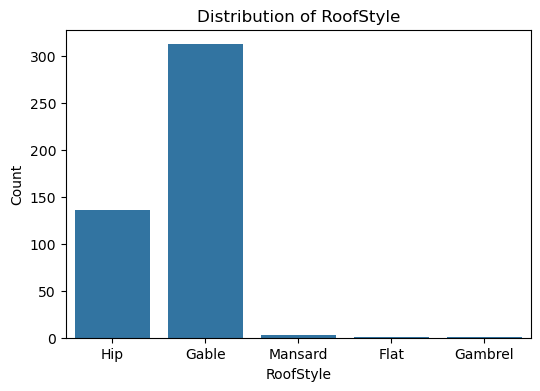

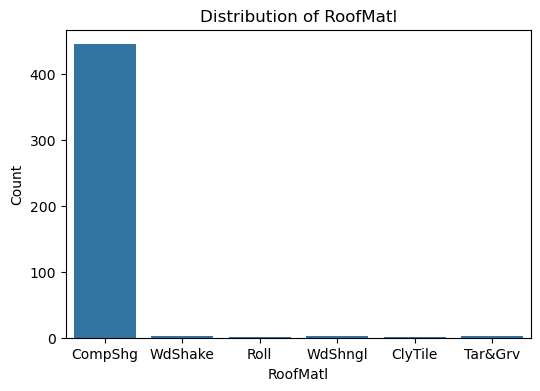

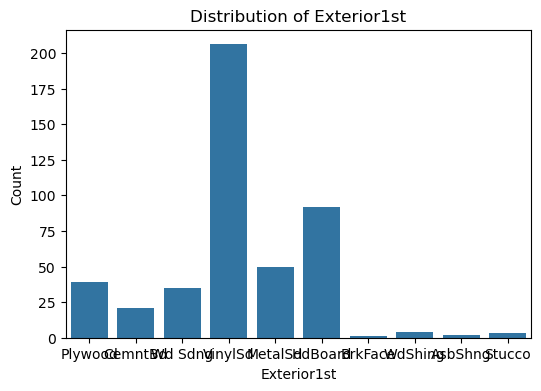

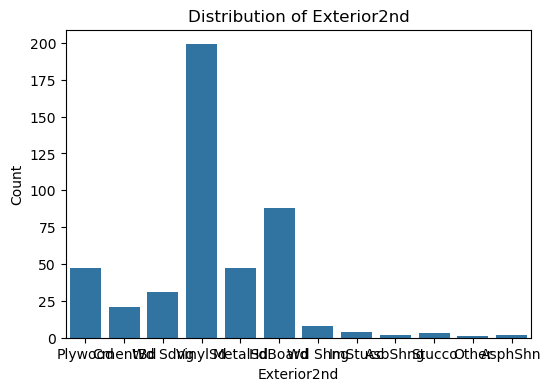

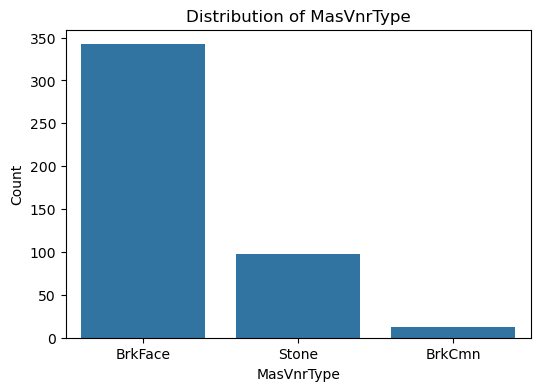

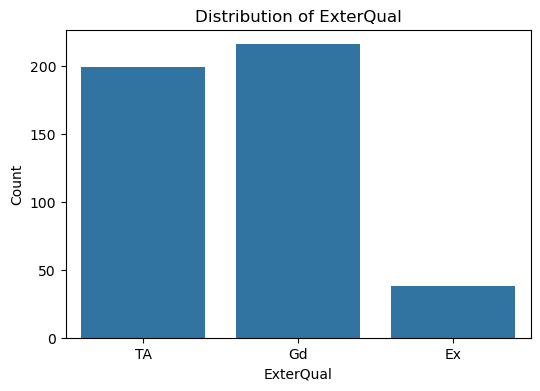

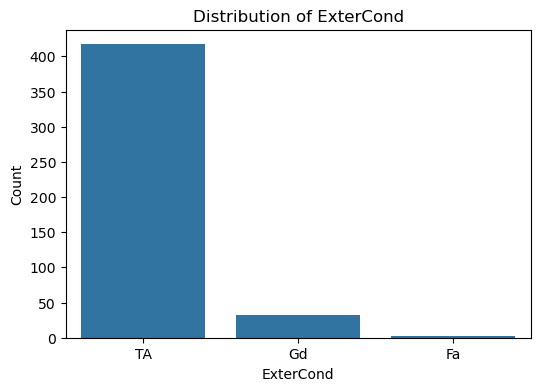

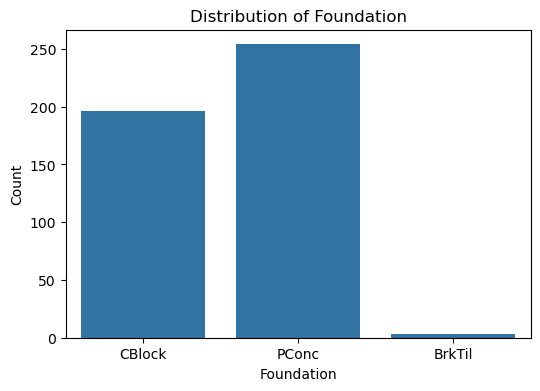

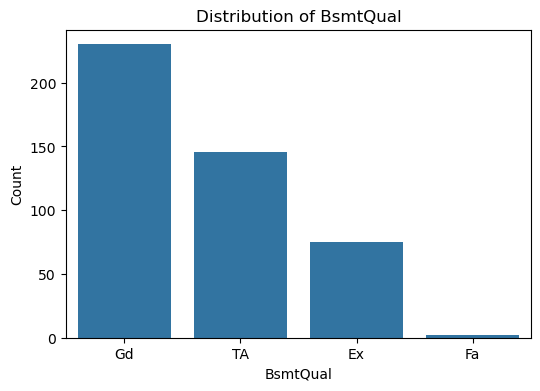

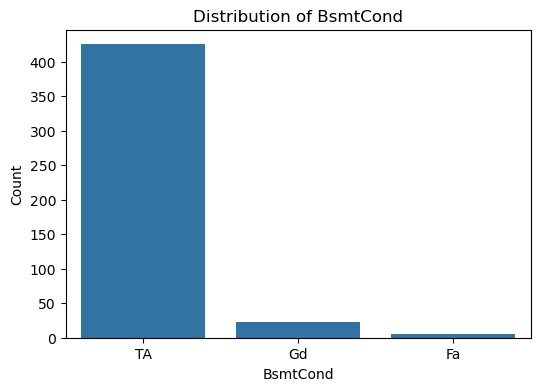

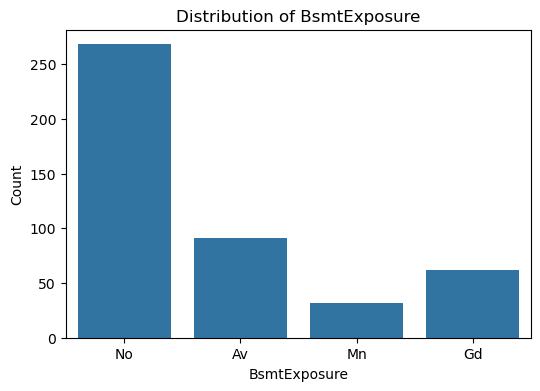

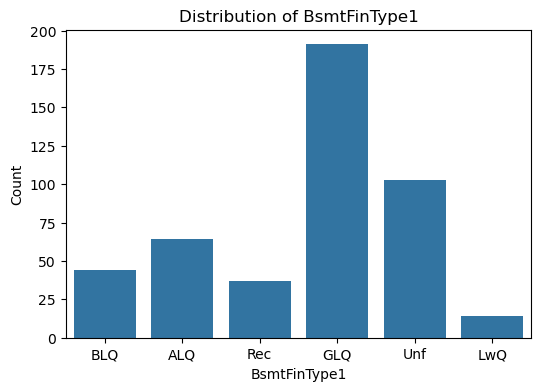

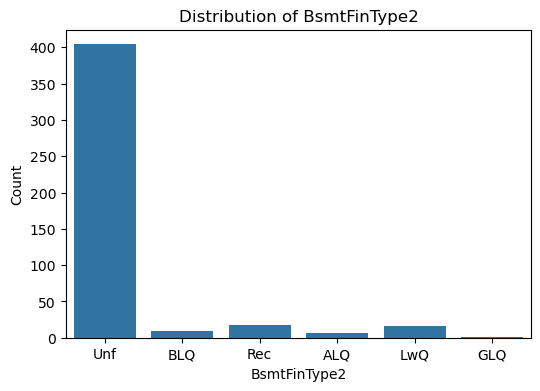

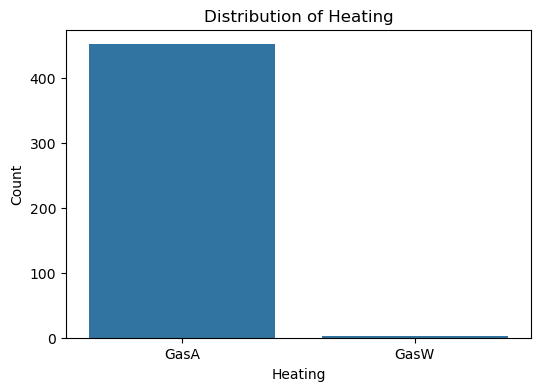

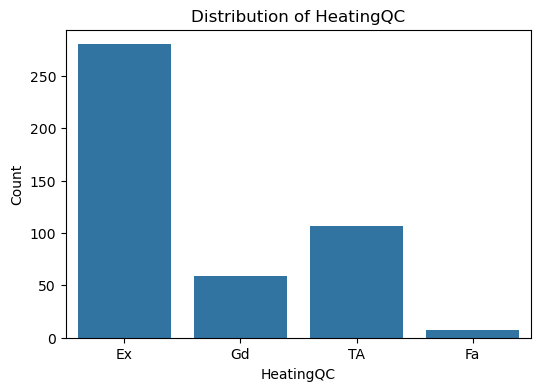

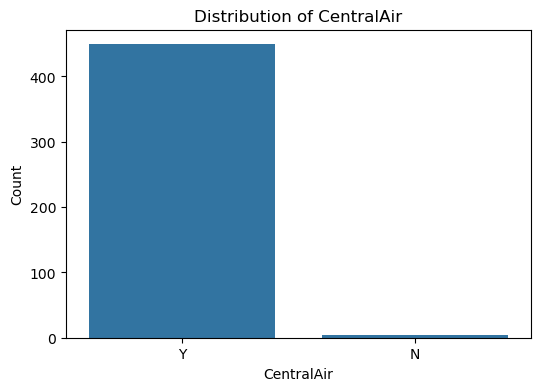

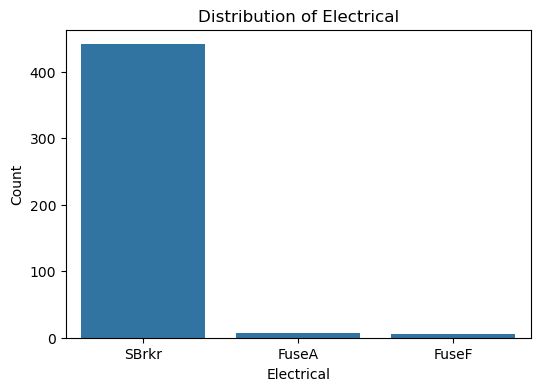

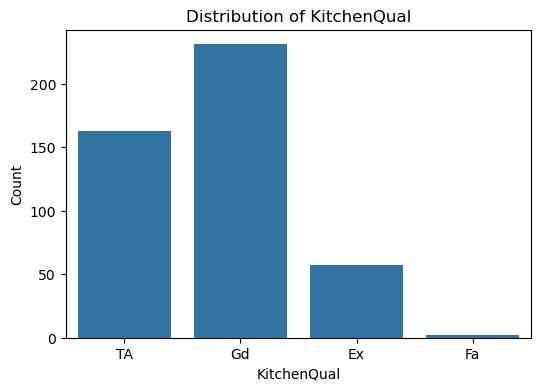

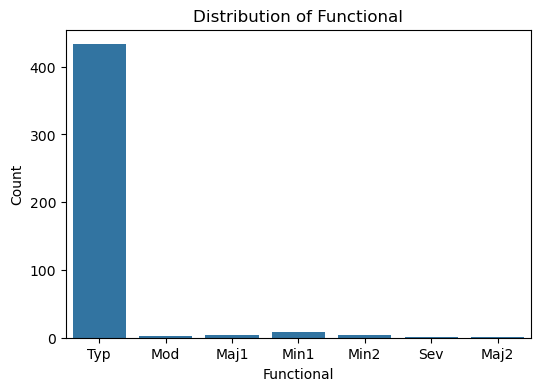

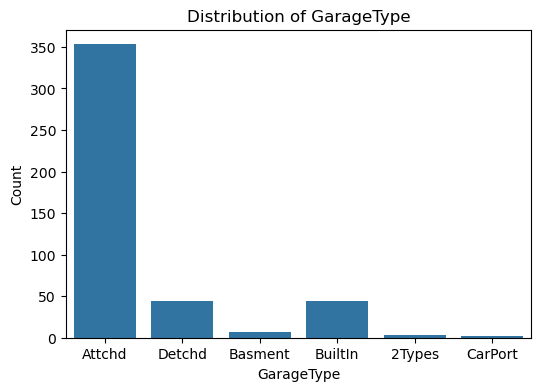

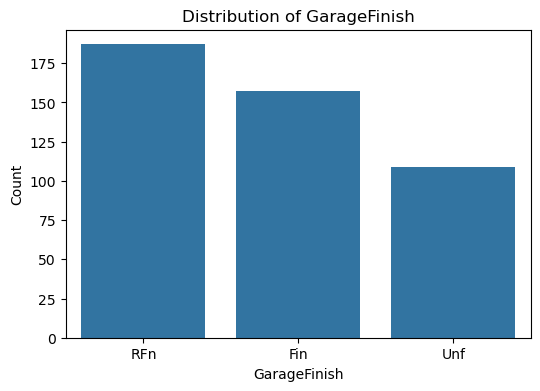

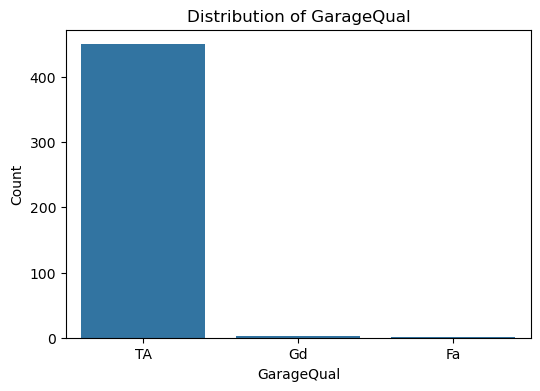

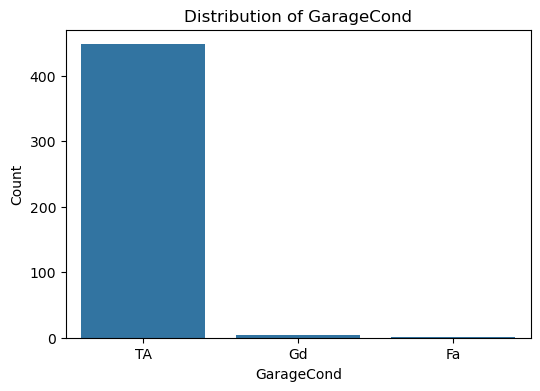

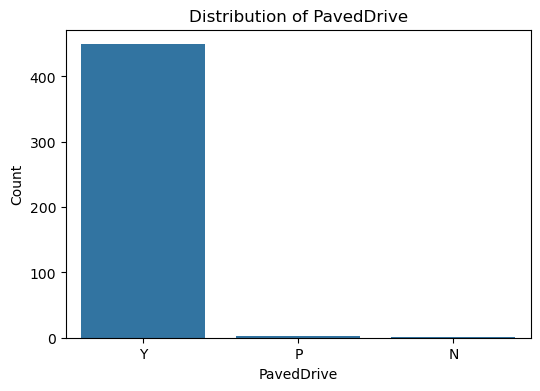

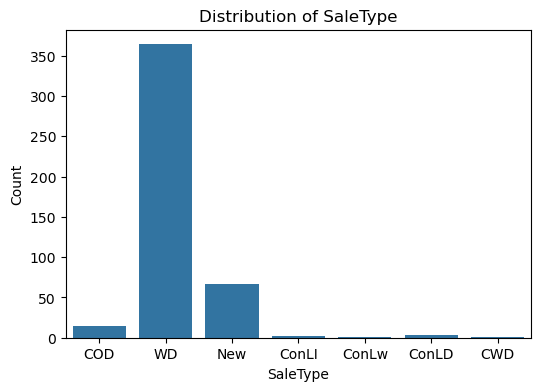

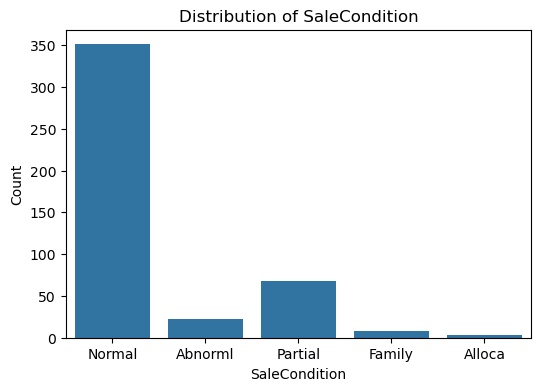

In [30]:
# Loop through each categorical column and create count plot
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=dataset1, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

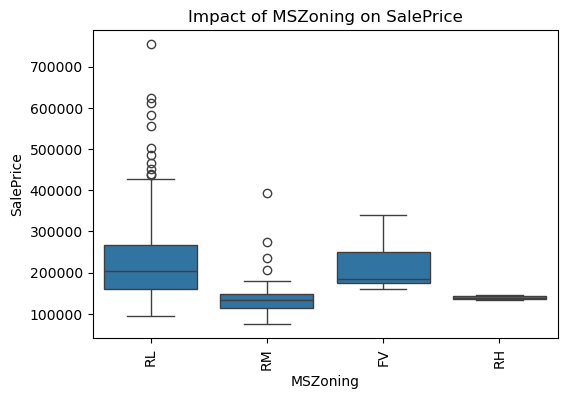

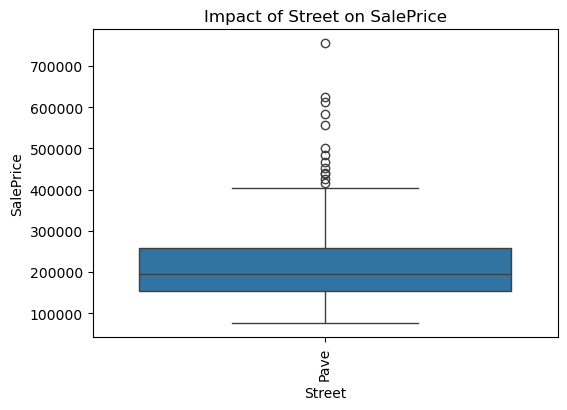

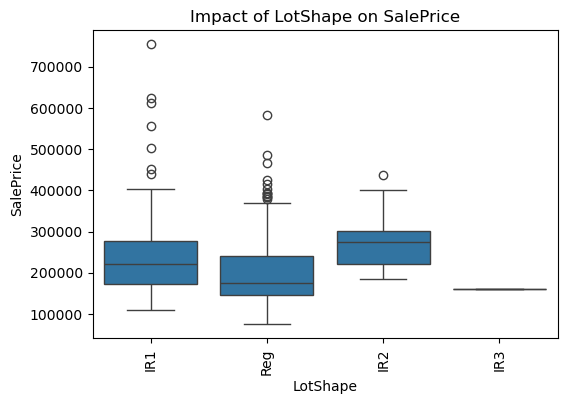

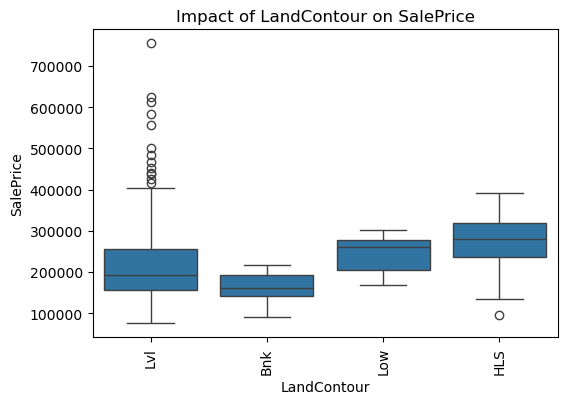

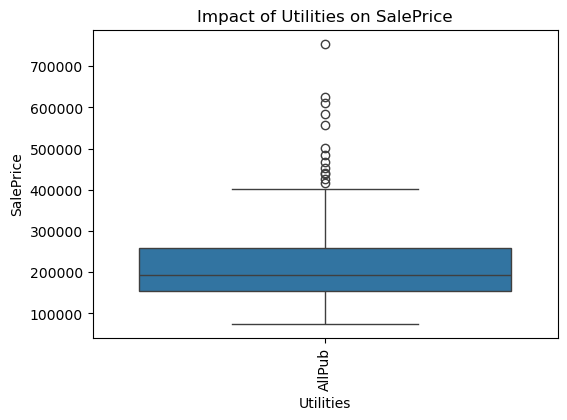

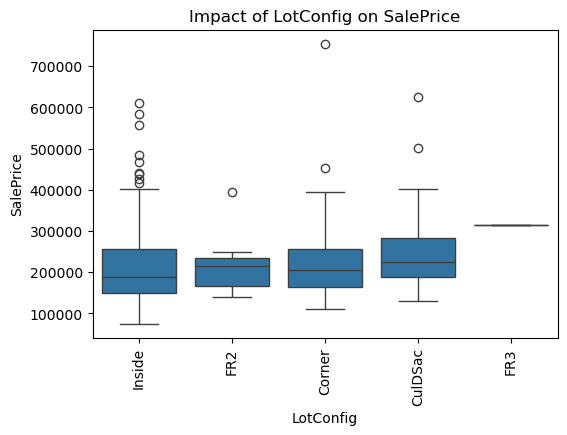

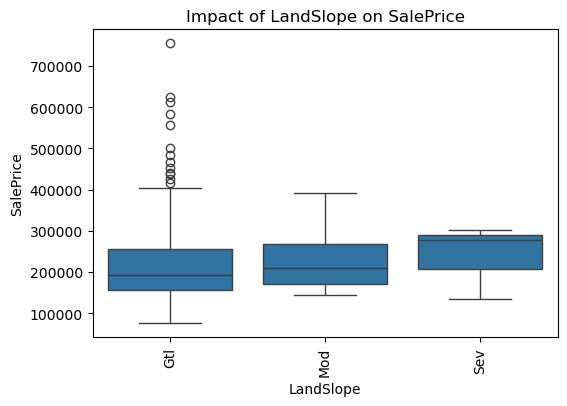

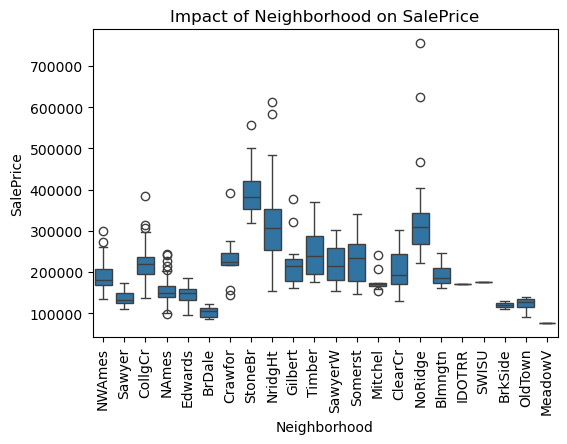

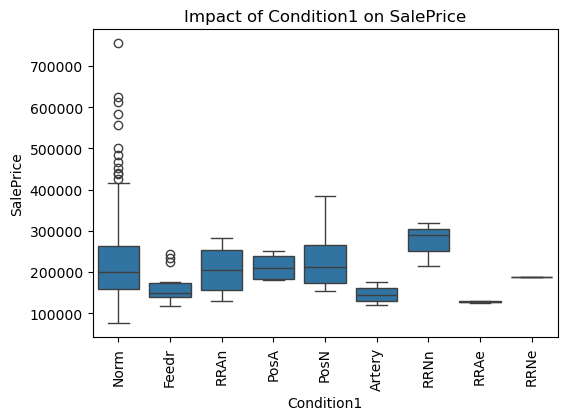

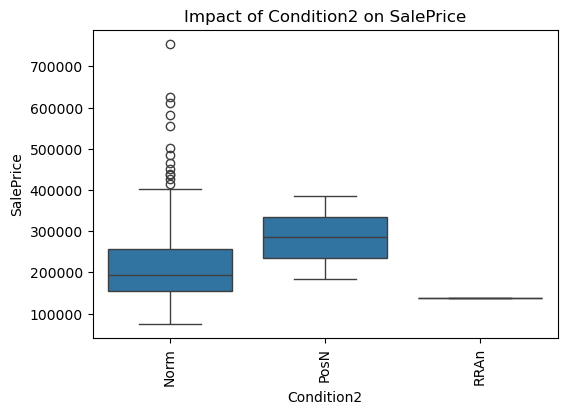

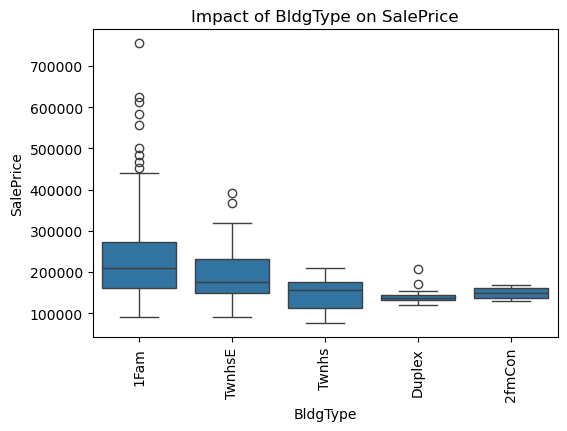

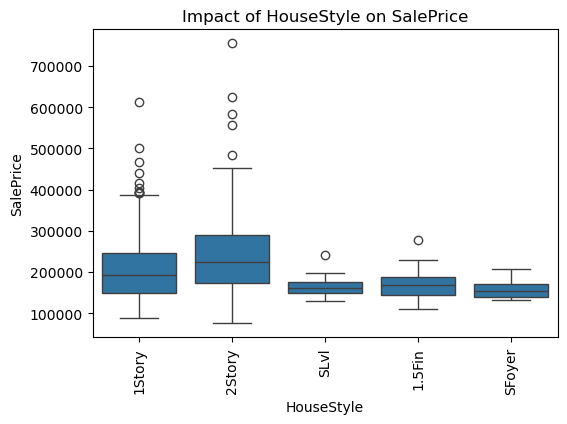

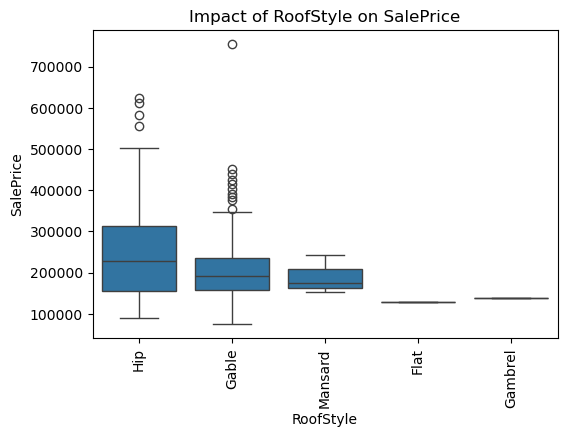

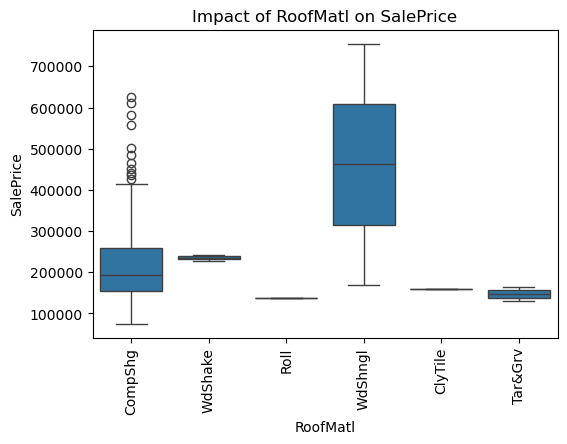

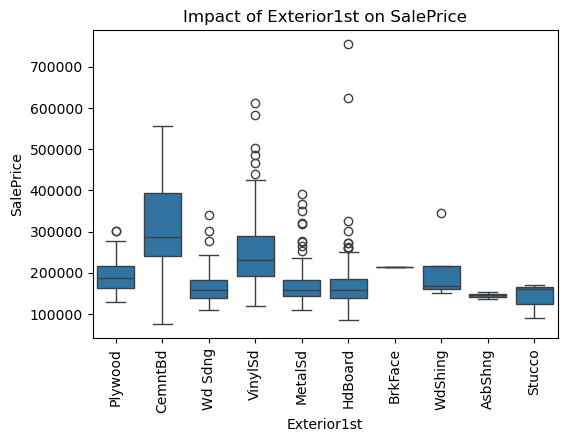

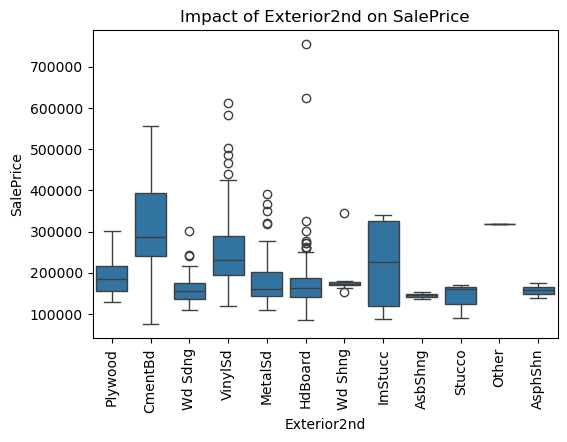

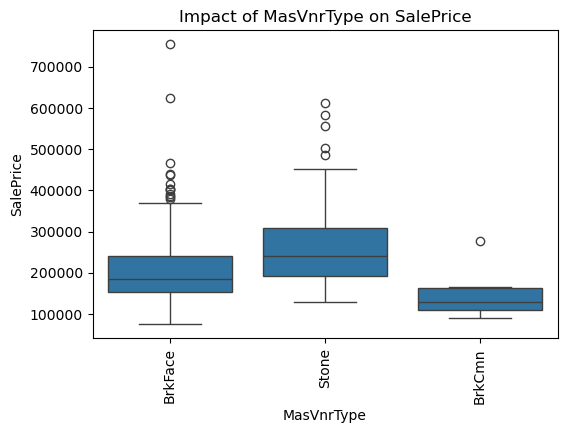

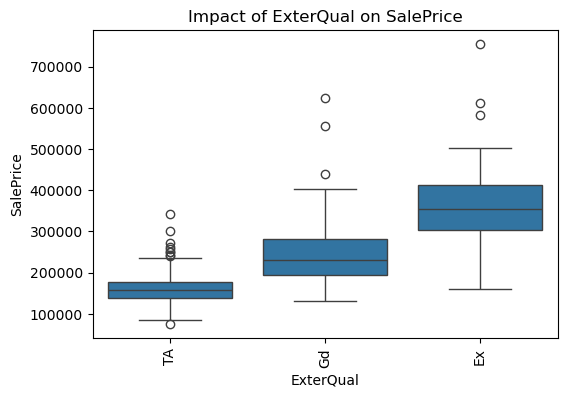

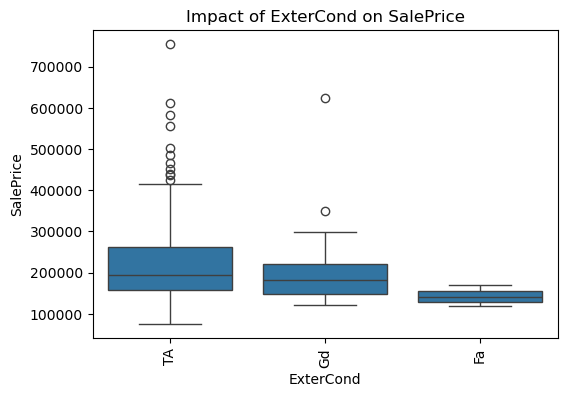

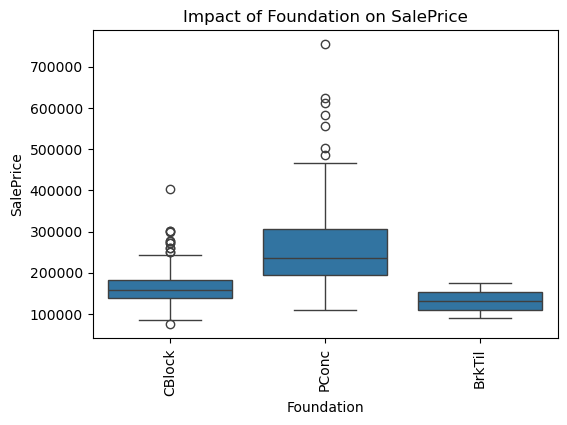

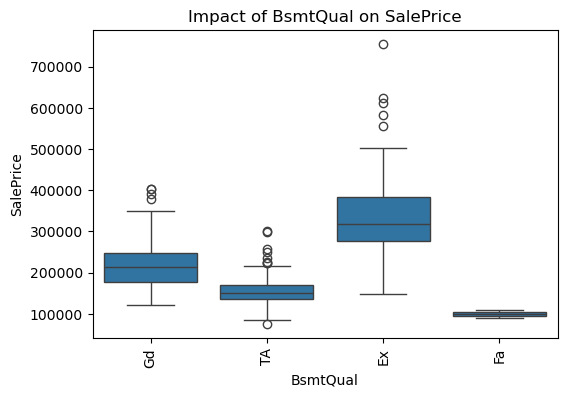

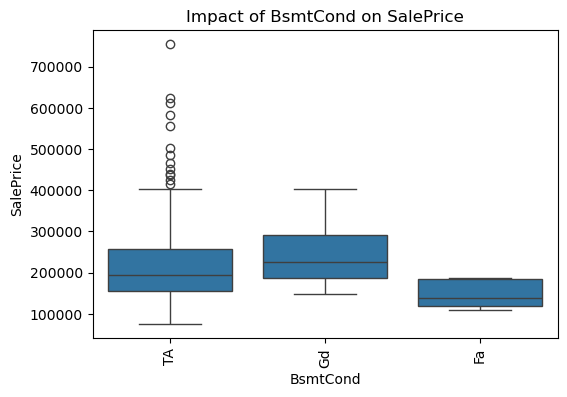

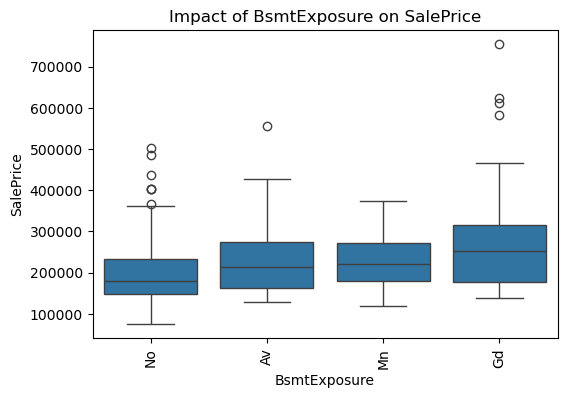

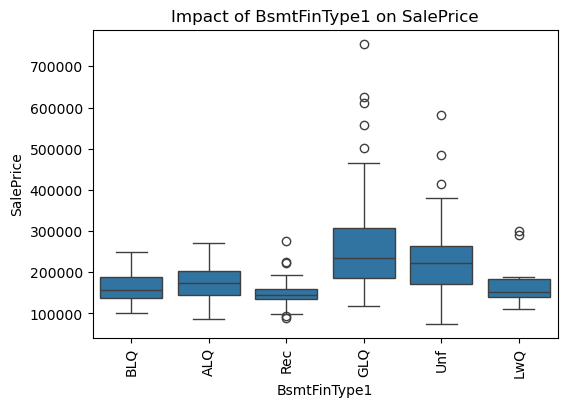

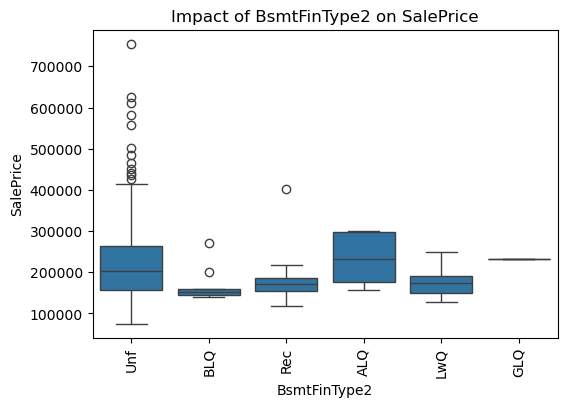

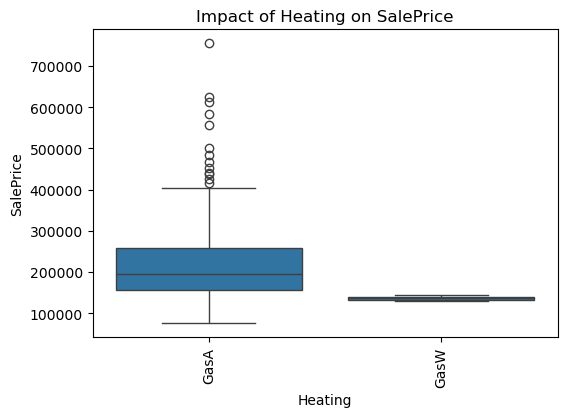

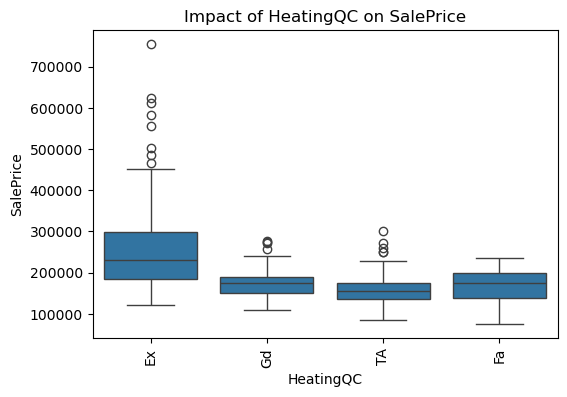

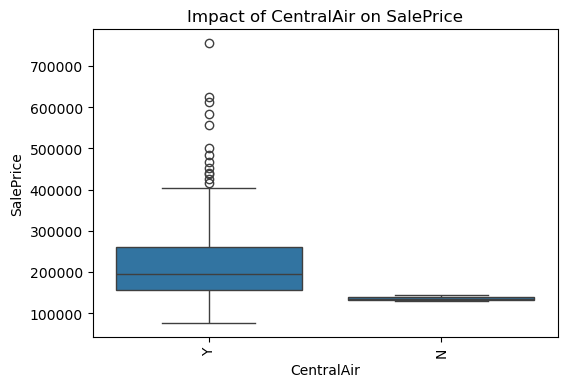

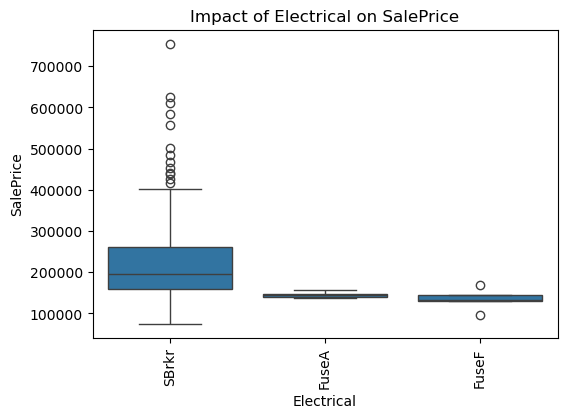

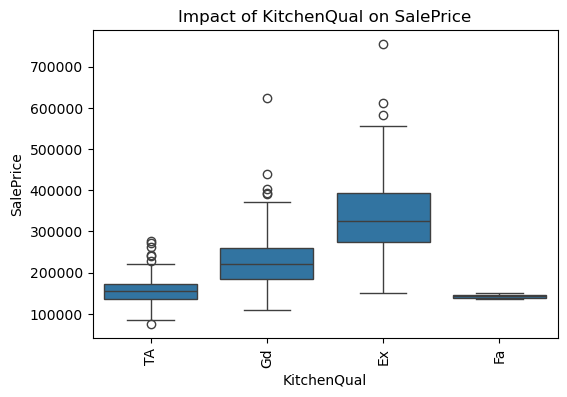

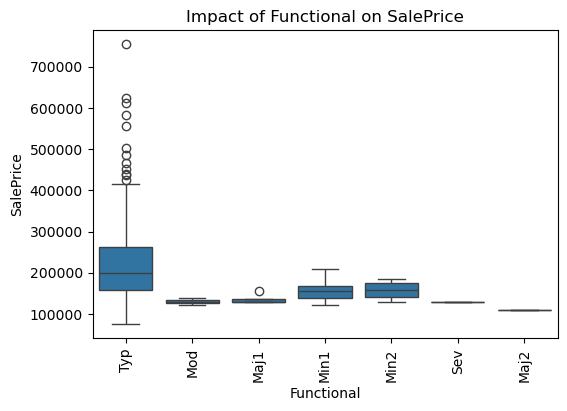

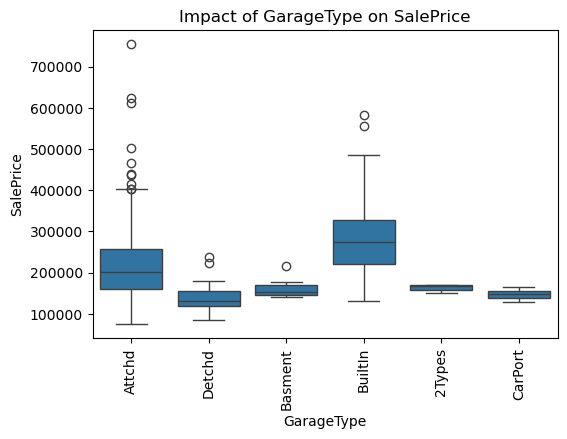

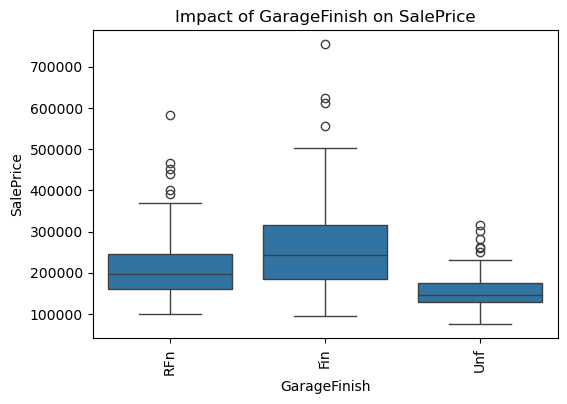

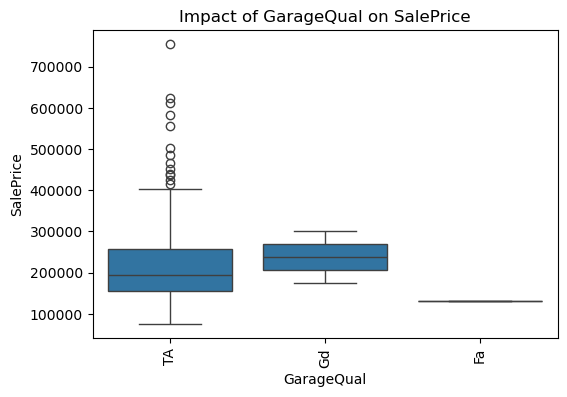

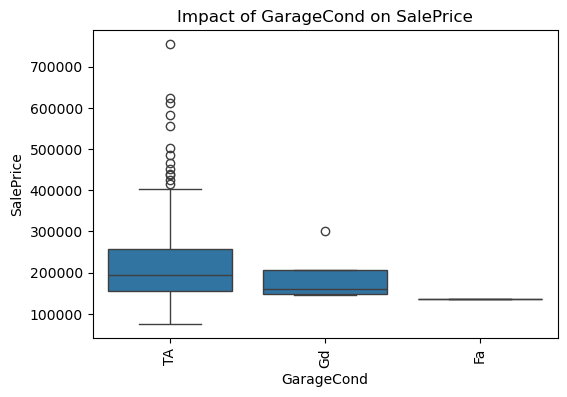

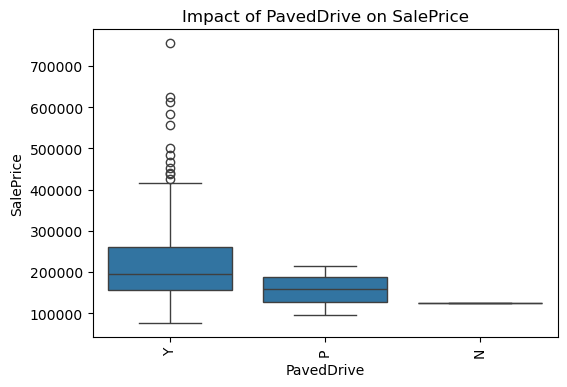

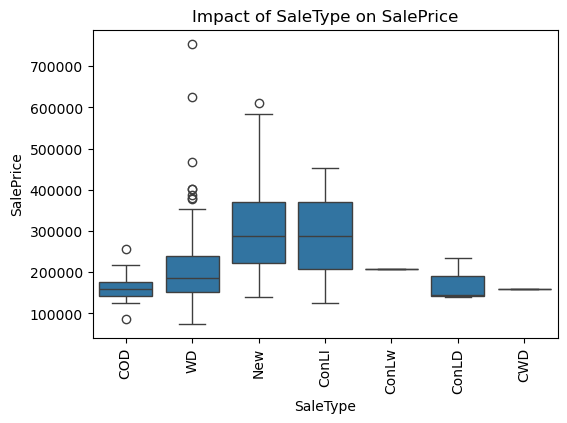

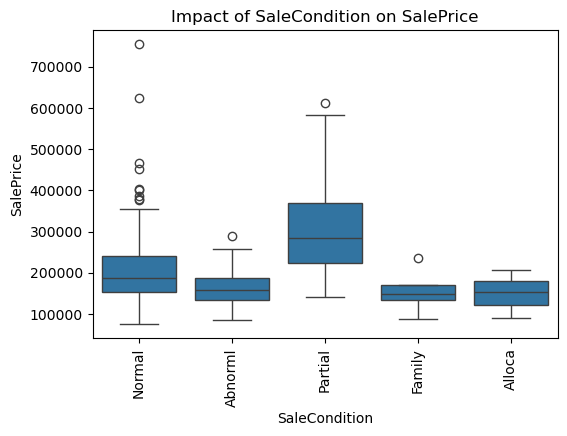

In [32]:
# Loop through each categorical column and creating box plot

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=dataset1, x=column, y='SalePrice')
    plt.title(f"Impact of {column} on SalePrice")
    plt.xlabel(column)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=90)
    plt.show()

In [34]:
numerical_columns = dataset1.select_dtypes(include=['int', 'float']).columns.tolist()
print("Numerical Columns:\n", numerical_columns)

Numerical Columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [35]:
correlation = dataset1.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print(correlation)

SalePrice        1.000000
OverallQual      0.787725
GarageCars       0.656348
GrLivArea        0.655643
GarageArea       0.640466
YearBuilt        0.566803
TotRmsAbvGrd     0.565580
GarageYrBlt      0.548756
FullBath         0.537439
YearRemodAdd     0.516935
1stFlrSF         0.506736
TotalBsmtSF      0.502329
MasVnrArea       0.439125
Fireplaces       0.372103
WoodDeckSF       0.322875
OpenPorchSF      0.309208
2ndFlrSF         0.302948
BsmtFinSF1       0.257414
LotArea          0.223296
BsmtUnfSF        0.214772
HalfBath         0.193193
BsmtFullBath     0.146369
BedroomAbvGr     0.122236
ScreenPorch      0.063421
3SsnPorch        0.052130
MoSold           0.010284
YrSold          -0.009315
MiscVal         -0.011073
PoolArea        -0.018992
BsmtHalfBath    -0.033233
EnclosedPorch   -0.071441
BsmtFinSF2      -0.081007
KitchenAbvGr    -0.129393
OverallCond     -0.161832
MSSubClass      -0.181048
LowQualFinSF          NaN
Name: SalePrice, dtype: float64


In [36]:
# this features has almost no effect on our target variable

dataset1=dataset1.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr' ,'EnclosedPorch',
                      '3SsnPorch','ScreenPorch','MiscVal'],axis=1)
dataset1.shape

(453, 66)

In [37]:
# to get the idea about the direction of outlier
dataset1.skew(numeric_only=True)

MSSubClass       1.149413
LotArea         10.045048
OverallQual      0.282464
OverallCond      1.412068
YearBuilt       -0.476615
YearRemodAdd    -0.813015
MasVnrArea       2.215083
BsmtFinSF1       2.301951
BsmtUnfSF        0.948924
TotalBsmtSF      2.871405
1stFlrSF         1.570328
2ndFlrSF         0.785369
GrLivArea        1.787166
BsmtFullBath     0.152013
FullBath        -0.435488
HalfBath         0.382016
BedroomAbvGr     0.003602
TotRmsAbvGrd     0.646767
Fireplaces       0.325072
GarageYrBlt     -0.521394
GarageCars       0.026992
GarageArea       0.895255
WoodDeckSF       0.983581
OpenPorchSF      1.646988
PoolArea        12.531306
MoSold           0.142777
YrSold           0.154817
SalePrice        1.763616
dtype: float64

In [38]:
mod_numerical_columns = dataset1.select_dtypes(include=['int', 'float']).columns.tolist()
print("Modified Numerical Columns:\n", mod_numerical_columns)

Modified Numerical Columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']


### Removing outliers by  Imputation 

In [40]:
# we are not using mean imputation as it still leaves significant outliers
# that is why replacing with upper and lower quartile accordingly

for column in mod_numerical_columns:
    # Calculate IQR
    Q1 = dataset1[column].quantile(0.25)
    Q3 = dataset1[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate bounds for replacing extreme outliers
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Replace outliers with Q1 or Q3
    dataset1[column] = dataset1[column].apply(lambda x: Q1 if x < lower_bound 
                                            else (Q3 if x > upper_bound else x))


<Figure size 600x400 with 0 Axes>

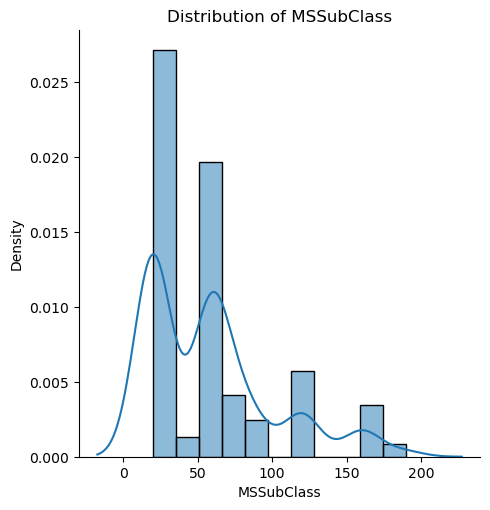

<Figure size 600x400 with 0 Axes>

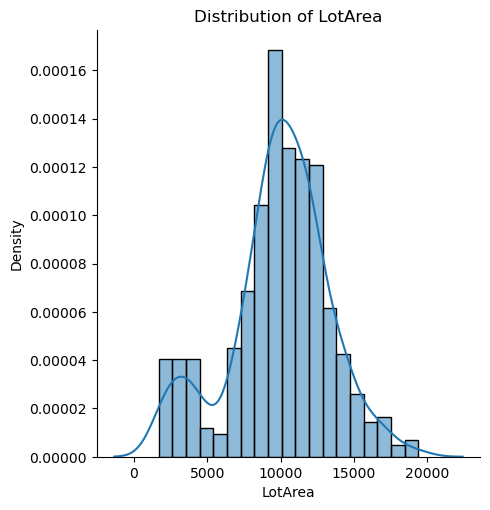

<Figure size 600x400 with 0 Axes>

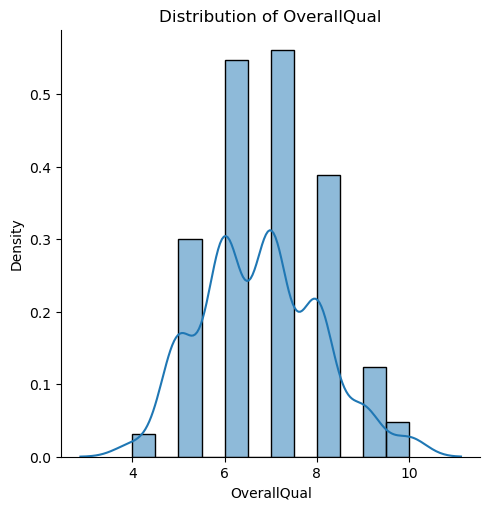

<Figure size 600x400 with 0 Axes>

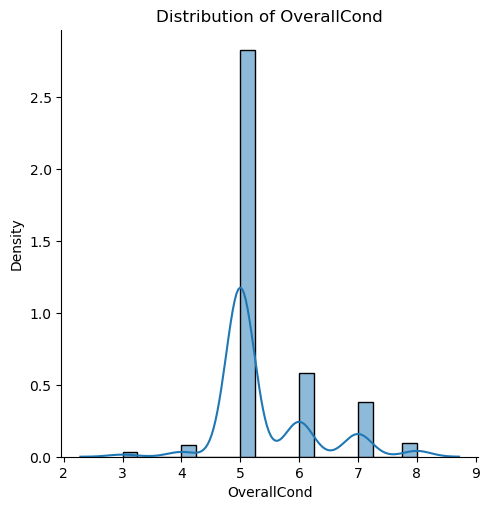

<Figure size 600x400 with 0 Axes>

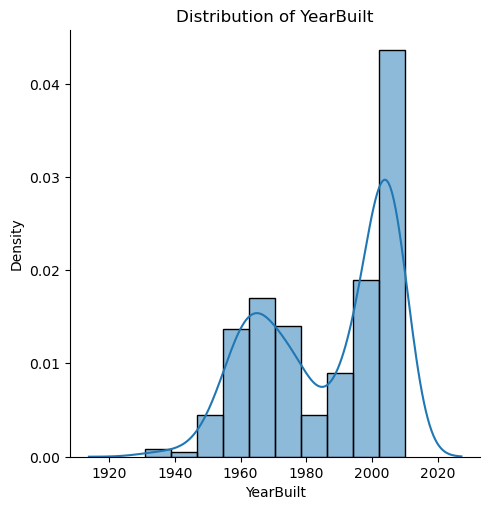

<Figure size 600x400 with 0 Axes>

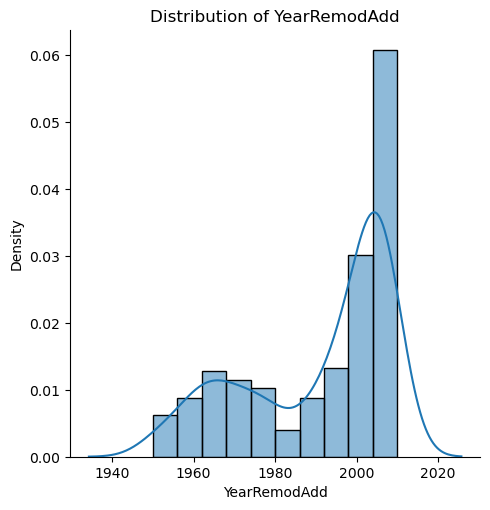

<Figure size 600x400 with 0 Axes>

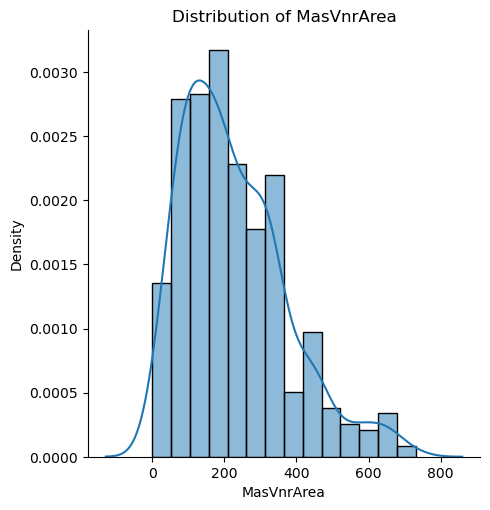

<Figure size 600x400 with 0 Axes>

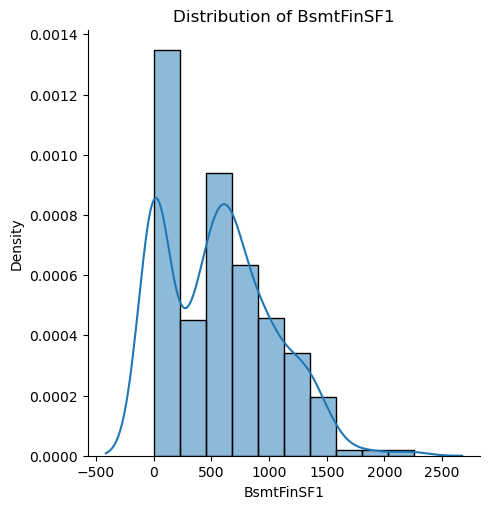

<Figure size 600x400 with 0 Axes>

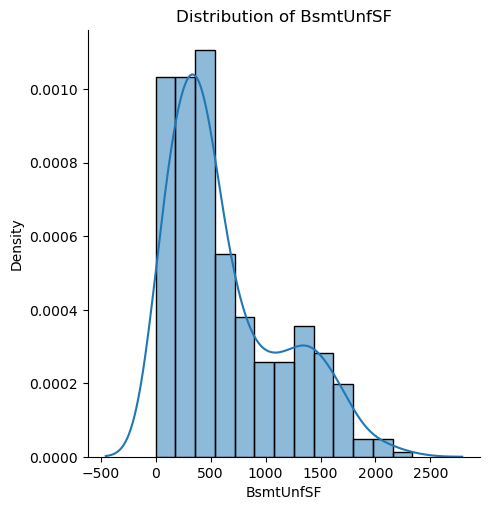

<Figure size 600x400 with 0 Axes>

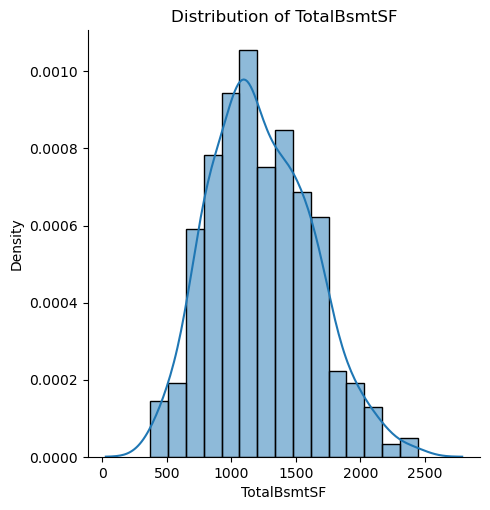

<Figure size 600x400 with 0 Axes>

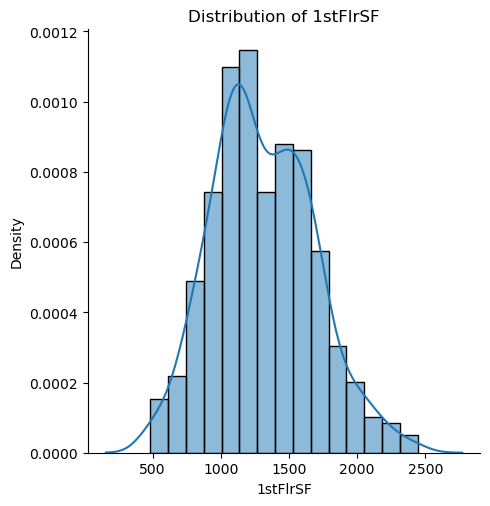

<Figure size 600x400 with 0 Axes>

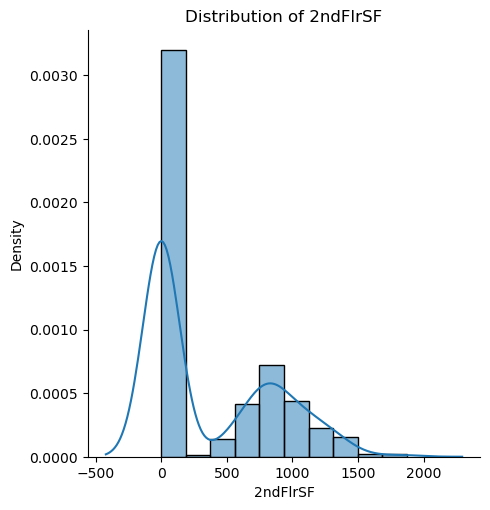

<Figure size 600x400 with 0 Axes>

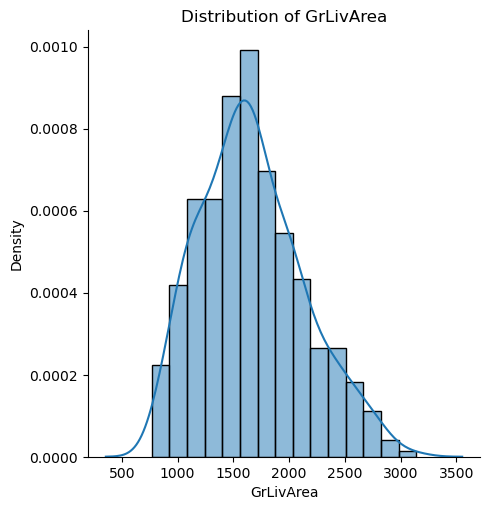

<Figure size 600x400 with 0 Axes>

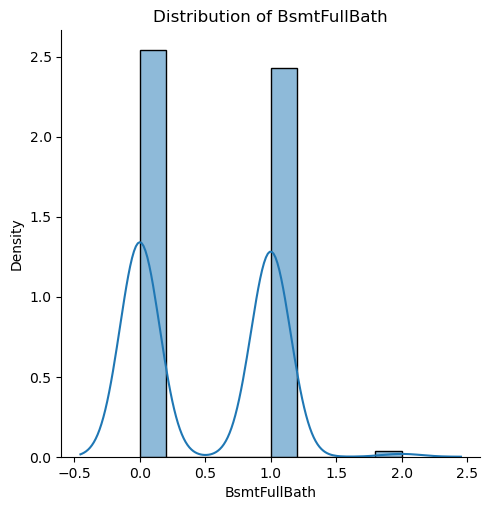

<Figure size 600x400 with 0 Axes>

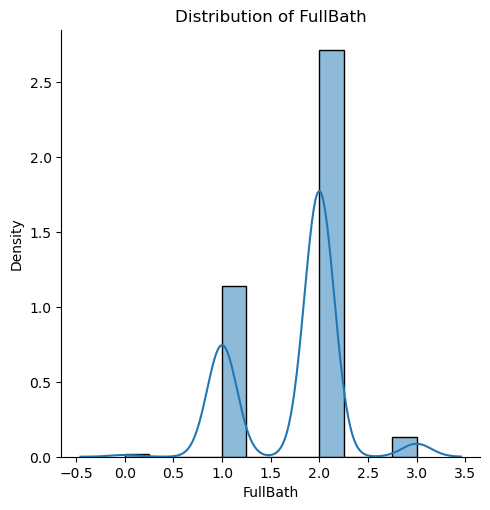

<Figure size 600x400 with 0 Axes>

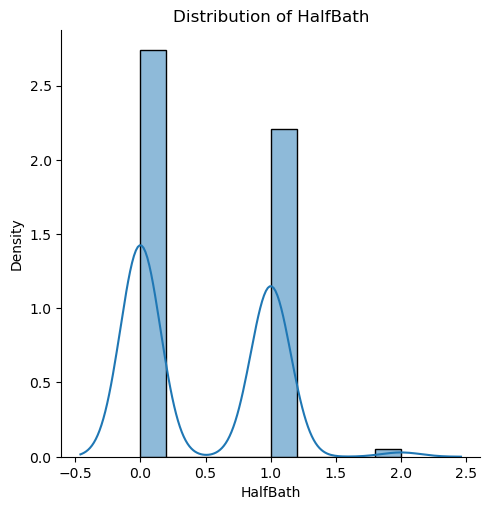

<Figure size 600x400 with 0 Axes>

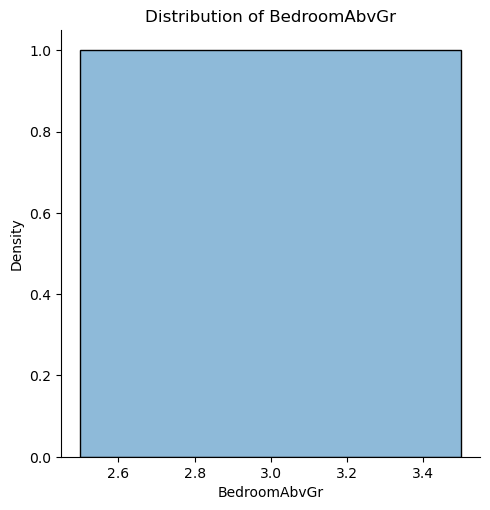

<Figure size 600x400 with 0 Axes>

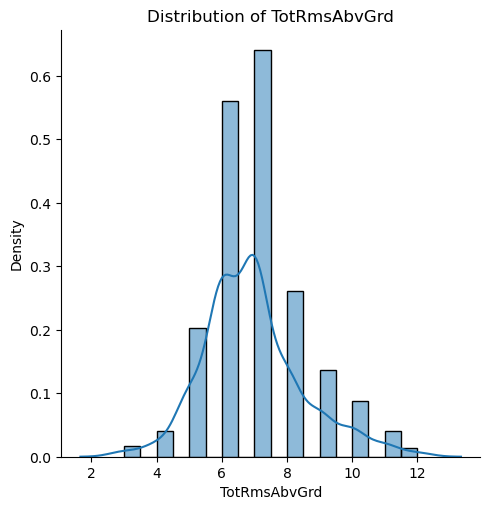

<Figure size 600x400 with 0 Axes>

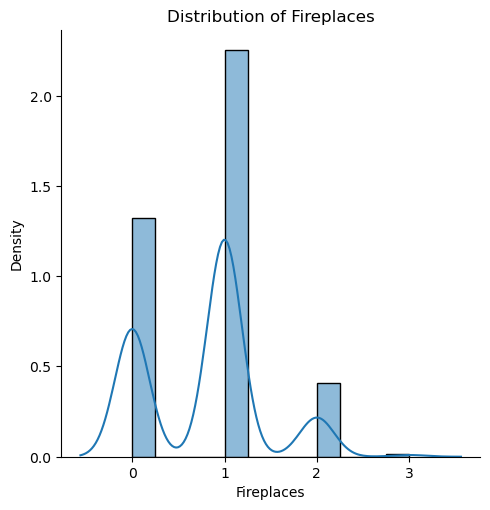

<Figure size 600x400 with 0 Axes>

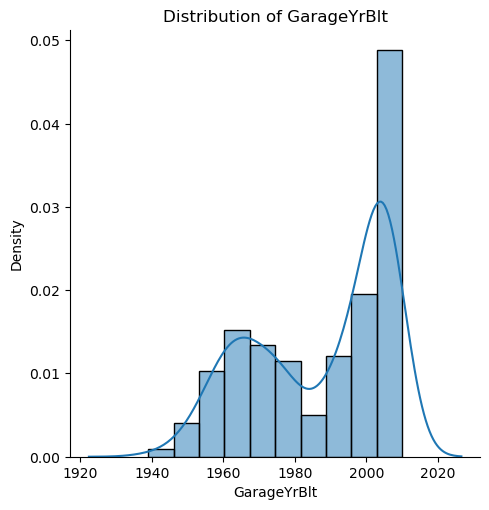

<Figure size 600x400 with 0 Axes>

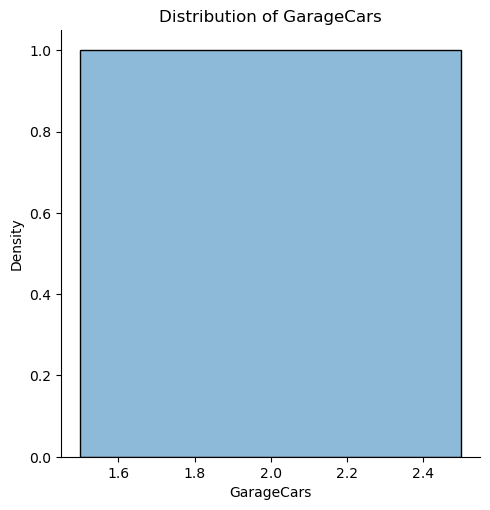

<Figure size 600x400 with 0 Axes>

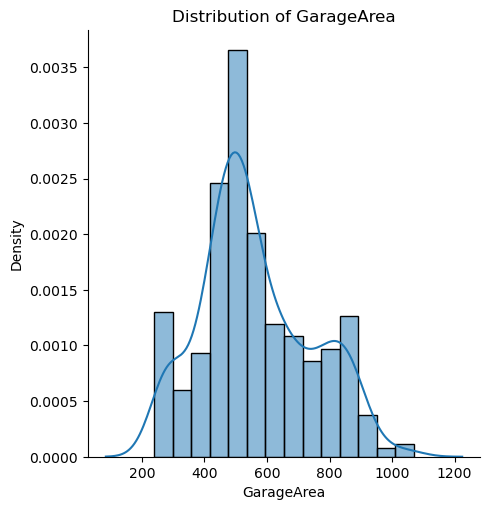

<Figure size 600x400 with 0 Axes>

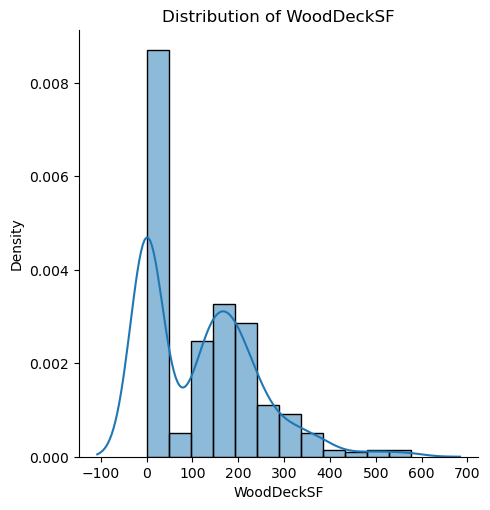

<Figure size 600x400 with 0 Axes>

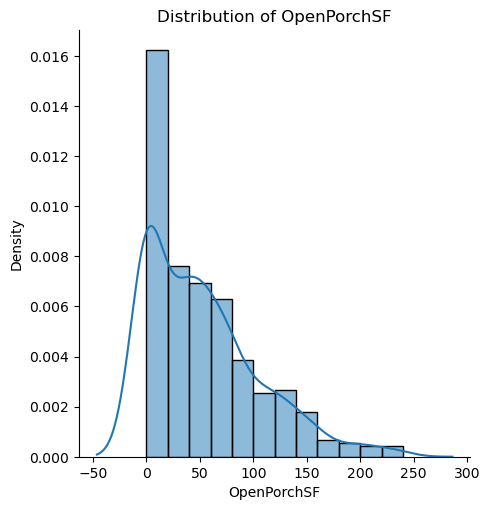

<Figure size 600x400 with 0 Axes>

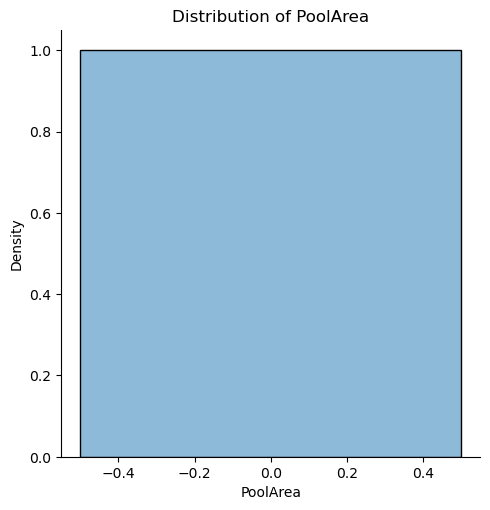

<Figure size 600x400 with 0 Axes>

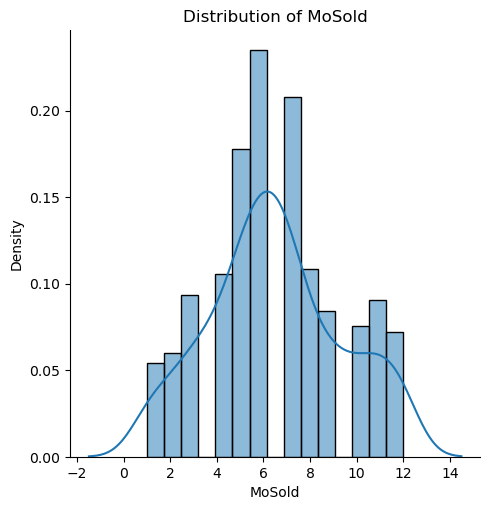

<Figure size 600x400 with 0 Axes>

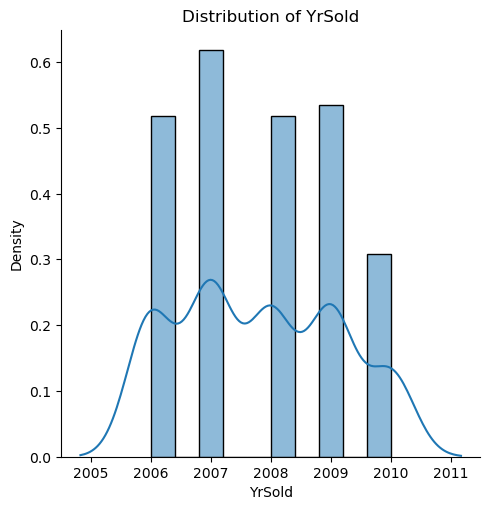

<Figure size 600x400 with 0 Axes>

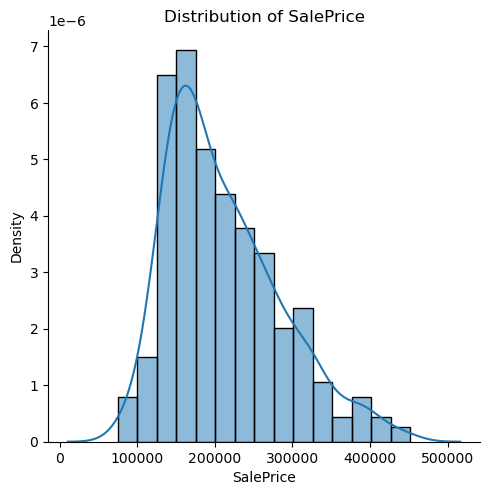

In [41]:

for column in mod_numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.displot(dataset1[column], kde=True,stat='density',kde_kws=dict(cut=3))
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

### Encoding our categorical variable

In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through each categorical column and encode them
for column in categorical_columns:
    dataset1[column] = label_encoder.fit_transform(dataset1[column])

# Display the updated dataset with encoded categorical columns
pd.set_option('display.max_columns', None)  # Display all rows without truncation
dataset1.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,20,2,11751.0,0,0,3,0,4,0,12,2,0,0,1,6,6.0,1977,1977,3,1,5,7,1,480.0,2,2,1,2,2,3,1,705.0,5,1139,1844.0,0,0,1,2,1844.0,0,1844.0,0,2,0,3.0,3,7,6,1,1,1977.0,1,2.0,546.0,2,2,2,0.0,122.0,0.0,1,2010,0,3,190000.0
4,20,2,16635.0,0,0,3,0,2,0,12,2,0,0,1,6,7.0,1977,2000,1,1,2,2,2,126.0,1,2,1,2,2,3,0,1246.0,5,356,1602.0,0,2,1,2,1602.0,0,1602.0,0,2,0,3.0,2,8,6,1,1,1977.0,0,2.0,529.0,2,2,2,240.0,0.0,0.0,6,2009,6,3,215000.0
6,20,2,11341.0,0,0,3,0,4,0,17,2,0,0,1,5,6.0,1957,1996,3,1,8,10,1,180.0,2,2,1,2,2,3,0,1302.0,5,90,1392.0,0,3,1,2,1392.0,0,1392.0,1,1,1,3.0,3,5,4,1,5,1957.0,2,2.0,528.0,2,2,2,0.0,0.0,0.0,5,2010,6,3,121500.0
7,20,2,13125.0,0,3,3,0,0,0,17,2,0,0,1,5,4.0,1957,2000,1,1,8,10,0,67.0,2,2,1,3,2,3,4,168.0,1,284,1134.0,0,0,1,2,1803.0,0,1803.0,1,2,0,3.0,3,8,0,1,1,1957.0,1,2.0,484.0,2,2,2,0.0,0.0,0.0,1,2006,6,3,155000.0
11,60,2,9548.0,0,0,3,0,1,0,4,2,0,0,2,7,6.0,2003,2003,1,1,7,9,1,223.0,1,2,2,2,2,3,2,483.0,5,458,941.0,0,0,1,2,941.0,888,1829.0,1,2,1,3.0,2,7,6,1,1,2003.0,1,2.0,613.0,2,2,2,192.0,39.0,0.0,1,2010,6,3,237000.0


#### Our testing data is stored in a different file. so we have to perform all the same preprocessing techniques that we have applied on training dataset.

### Loading our testing dataset

In [54]:
dataset2 = pd.read_csv(r"https://lms.intrnforte.com/wp-content/uploads/2022/10/Hosuing-project-test-data.csv")
dataset2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [55]:
dataset2.shape

(292, 80)

In [58]:
dataset2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [64]:
dataset2.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [66]:
dataset2=dataset2.drop(['Id','LotFrontage','Alley','FireplaceQu','PoolQC' ,'Fence','MiscFeature'],axis=1)
dataset2.shape

(292, 73)

In [68]:
dataset2.dropna(axis=0,inplace=True)
dataset2.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 73, dtype: int64

In [70]:
categorical_columns = dataset2.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [72]:

dataset2=dataset2.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr' ,'EnclosedPorch',
                      '3SsnPorch','ScreenPorch','MiscVal'],axis=1)
dataset2.shape

(122, 65)

In [74]:
numerical_columns = dataset2.select_dtypes(include=['int', 'float']).columns.tolist()
print("Modified Numerical Columns:\n", mod_numerical_columns)

Modified Numerical Columns:
 ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MoSold', 'YrSold', 'SalePrice']


In [76]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Loop through each categorical column and encode them
for column in categorical_columns:
    dataset2[column] = label_encoder.fit_transform(dataset2[column])

# Display the updated dataset with encoded categorical columns
pd.set_option('display.max_columns', None)  # Display all rows without truncation
dataset2.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,MoSold,YrSold,SaleType,SaleCondition
0,20,1,14157,1,0,1,0,0,0,17,2,0,0,1,9,5,2005,2006,1,0,5,6,2,200.0,1,1,1,0,2,1,2,1249,4,673,1922,0,0,0,1,1922,0,1922,1,2,0,3,1,8,2,1,1,2005.0,0,3,676,1,2,1,178,51,0,7,2007,3,2
4,60,1,14598,1,0,3,0,1,0,16,1,0,0,2,6,5,2007,2007,0,0,5,6,2,74.0,1,1,1,2,2,2,5,0,4,894,894,0,0,0,1,894,1039,1933,0,2,1,4,1,9,2,1,3,2007.0,0,3,668,1,2,1,100,18,0,1,2008,3,2
6,180,2,3675,1,2,3,0,4,0,6,2,0,3,4,5,5,2005,2005,0,0,5,6,1,80.0,2,1,1,2,2,1,2,547,4,0,547,0,2,0,1,1072,0,1072,1,1,0,2,2,5,2,0,2,2005.0,0,2,525,1,2,1,0,28,0,5,2006,3,2
7,20,1,13891,1,2,3,0,4,0,12,2,0,0,1,8,5,2007,2008,1,0,5,6,2,436.0,1,1,1,0,2,1,2,1400,4,310,1710,0,0,0,1,1710,0,1710,1,2,0,2,1,6,2,1,1,2007.0,1,3,866,1,2,1,0,102,0,1,2008,2,3
8,80,1,12800,1,2,2,0,4,1,15,2,0,0,4,7,5,1989,1989,0,0,6,7,1,145.0,1,1,1,2,2,1,2,1518,4,0,1518,0,2,0,1,1644,0,1644,1,2,0,2,1,5,2,1,1,1989.0,0,2,569,1,2,1,80,0,0,8,2009,3,2


In [78]:
dataset1.shape

(453, 66)

In [80]:
dataset2.shape  #  1338+1319=2657

(122, 65)

####  Since the target variable is not provided in our test dataset so we cannot use that for training our model. So What we will do is we train our model on training dataset and find the best algorithym and then use it to predict the target variable in test dataset.  

In [83]:
from sklearn.model_selection import train_test_split

# Split Dataset 1 into features (X) and target variable (y)
X = dataset1.drop(columns=['SalePrice'])
y = dataset1['SalePrice']

# Split Dataset 1 into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)


### Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

# Initialize models
lr = LinearRegression()

# Fit models on the training data
lr.fit(X_train, y_train)

# Evaluate models on the validation data
linear_pred = lr.predict(X_val)



#### Evaluation metrics

In [95]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = root_mean_squared_error(y_val, linear_pred).round(2)

# Calculate MAE
mae = mean_absolute_error(y_val, linear_pred).round(2)

# Calculate R-squared score
r2 = r2_score(y_val, linear_pred).round(3)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)


RMSE: 39924.51
MAE: 26142.66
R-squared: 0.724


### Random Forest 

In [97]:
# Initialize models

rf = RandomForestRegressor(random_state=0)

# Fit models on the training data

rf.fit(X_train, y_train)

# Evaluate models on the validation data
rf_pred = rf.predict(X_val)


#### Evaluation metrics

In [99]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = root_mean_squared_error(y_val, rf_pred).round(2)

# Calculate MAE
mae = mean_absolute_error(y_val, rf_pred).round(2)

# Calculate R-squared score
r2 = r2_score(y_val, rf_pred).round(3)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

RMSE: 37162.03
MAE: 23422.08
R-squared: 0.761


### Gradient Boosting

In [101]:
# Initialize models

gb = GradientBoostingRegressor(random_state=0)

# Fit models on the training data

gb.fit(X_train, y_train)

# Evaluate models on the validation data

gb_pred = gb.predict(X_val)


#### Evaluation metrics

In [105]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = root_mean_squared_error(y_val, gb_pred).round(2)

# Calculate MAE
mae = mean_absolute_error(y_val, gb_pred).round(2)

# Calculate R-squared score
r2 = r2_score(y_val, gb_pred).round(3)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

RMSE: 39349.97
MAE: 24472.95
R-squared: 0.732


### KNN Regressor

In [107]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize models
knn= KNeighborsRegressor()

# Fit models on the training data
knn.fit(X_train, y_train)

# Evaluate models on the validation data
knn_pred = knn.predict(X_val)


#### Evaluation metrics

In [109]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = root_mean_squared_error(y_val, knn_pred).round(2)

# Calculate MAE
mae = mean_absolute_error(y_val, knn_pred).round(2)

# Calculate R-squared score
r2 = r2_score(y_val, knn_pred).round(3)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

RMSE: 55847.32
MAE: 37603.24
R-squared: 0.459


### Xgboost

In [111]:
from xgboost import XGBRegressor

# Initialize models
xgb = XGBRegressor(random_state=0)

# Fit models on the training data
xgb.fit(X_train, y_train)

# Evaluate models on the validation data
xgb_pred = xgb.predict(X_val)


#### Evaluation metrics

In [115]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = root_mean_squared_error(y_val, xgb_pred).round(2)

# Calculate MAE
mae = mean_absolute_error(y_val, xgb_pred).round(2)

# Calculate R-squared score
r2 = r2_score(y_val, xgb_pred).round(3)

print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

RMSE: 40359.89
MAE: 27119.46
R-squared: 0.718


#### Our best model  is Random forest regression as it has a R^2 value is 0.835 which is larger compared to  all the other regression models

In [117]:

# Using  the best model to predict the target variable for Dataset 2
dataset2_pred = rf.predict(dataset2)

for index, prediction in enumerate(dataset2_pred):
    print(f"SalesPrice Prediction for index {index}: {prediction}")

# Now dataset2_predictions contains the predicted target variable values for Dataset 2

SalesPrice Prediction for index 0: 322279.49
SalesPrice Prediction for index 1: 194893.76
SalesPrice Prediction for index 2: 141274.9
SalesPrice Prediction for index 3: 343073.33
SalesPrice Prediction for index 4: 218292.37
SalesPrice Prediction for index 5: 165437.55
SalesPrice Prediction for index 6: 175958.54
SalesPrice Prediction for index 7: 297101.41
SalesPrice Prediction for index 8: 180205.43
SalesPrice Prediction for index 9: 150124.91
SalesPrice Prediction for index 10: 153388.5
SalesPrice Prediction for index 11: 147022.0
SalesPrice Prediction for index 12: 167703.87
SalesPrice Prediction for index 13: 155664.37
SalesPrice Prediction for index 14: 192197.33
SalesPrice Prediction for index 15: 129446.92
SalesPrice Prediction for index 16: 325331.9
SalesPrice Prediction for index 17: 201543.21
SalesPrice Prediction for index 18: 323433.99
SalesPrice Prediction for index 19: 264354.8
SalesPrice Prediction for index 20: 266763.94
SalesPrice Prediction for index 21: 174032.0
Sale

<!-- # Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=0)
gb_model = GradientBoostingRegressor(random_state=0)

# Fit models on the training data
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Evaluate models on the validation data
linear_predictions = linear_model.predict(X_val)
rf_predictions = rf_model.predict(X_val)
gb_predictions = gb_model.predict(X_val)

# Calculate Mean Squared Error for each model's predictions
mse_linear = mean_squared_error(y_val, linear_predictions)
mse_rf = mean_squared_error(y_val, rf_predictions)
mse_gb = mean_squared_error(y_val, gb_predictions)

print("Linear Regression MSE:", mse_linear)
print("Random Forest MSE:", mse_rf)
print("Gradient Boosting MSE:", mse_gb)

# Choose the best model (lowest MSE)
best_model = linear_model if mse_linear < mse_rf and mse_linear < mse_gb else (
    rf_model if mse_rf < mse_gb else gb_model
)

# Load and preprocess Dataset 2
dataset2 = pd.read_csv('path/to/dataset2.csv')  # Replace with actual path
# Preprocess dataset2 as needed

# Use the best model to predict the target variable for Dataset 2
dataset2_predictions = best_model.predict(dataset2)

# Now dataset2_predictions contains the predicted target variable values for Dataset 2 -->